# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [5]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

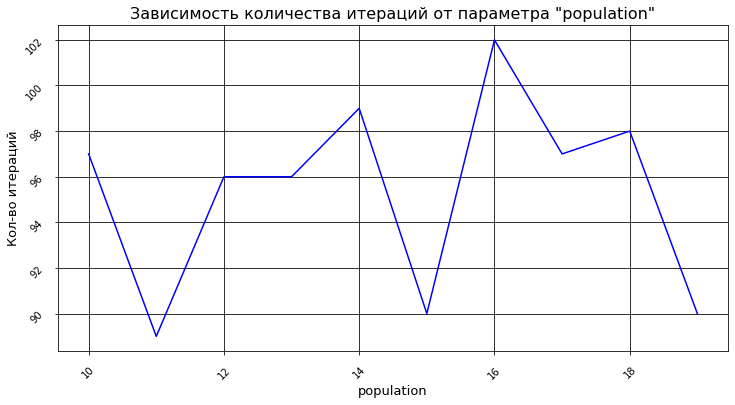

In [39]:
res1  =  []
population  =  []

for ps in range(10, 20):
    res1.append(differential_evolution(ackley,  bounds,  popsize=ps,  seed=42 )['nit'])
    population.append(ps)

fig1, ax1 = plt.subplots()
ax1.plot(population,  res1, color = 'b', linewidth = 1.5)

ax1.grid(which='major', color = 'k')
ax1.tick_params(axis = 'both', pad = 10, labelsize = 10, labelrotation = 45)

fig1.set_figwidth(12)
fig1.set_figheight(6)

plt.title('Зависимость количества итераций от параметра "population"', size=16)
plt.ylabel('Кол-во итераций', size = 13)
plt.xlabel('population', size = 13)
plt.show()

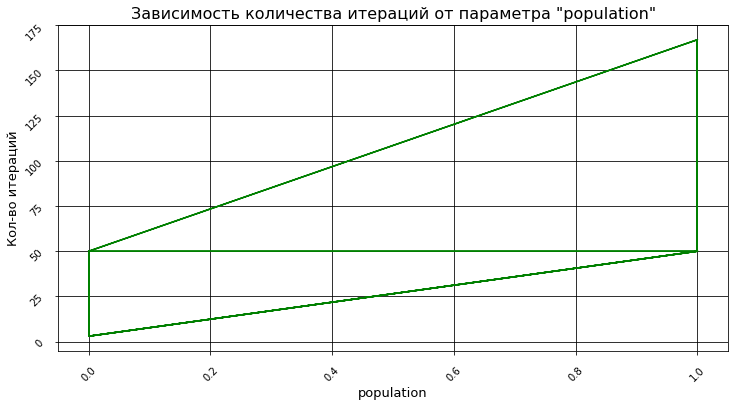

In [40]:
res2 = []
mutation = []

for vect in np.random.randint(2, size=(10, 2)):
    res2.append(differential_evolution(ackley,  bounds,  mutation=vect,  seed=42 )['nit'])
    mutation.append(vect)

fig2, ax2 = plt.subplots()
ax2.plot(mutation,  res2, color = 'g', linewidth = 1.5)

ax2.grid(which='major', color = 'k')
ax2.tick_params(axis = 'both', pad = 10, labelsize = 10, labelrotation = 45)

fig2.set_figwidth(12)
fig2.set_figheight(6)

plt.title('Зависимость количества итераций от параметра "mutation"', size=16)
plt.ylabel('Кол-во итераций', size = 13)
plt.xlabel('mutation', size = 13)
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [7]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [15]:
result_m1 = minimize(ackley, [0, 2],  method='Nelder-Mead', jac=None, options={'xtol':1e-10, 'disp':True})
result_m1

Optimization terminated successfully.
         Current function value: 4.884065
         Iterations: 60
         Function evaluations: 123


 final_simplex: (array([[1.00793975e-09, 1.95891972e+00],
       [1.04464571e-09, 1.95891972e+00],
       [1.00725319e-09, 1.95891972e+00]]), array([4.88406526, 4.88406526, 4.88406526]))
           fun: 4.884065258091152
       message: 'Optimization terminated successfully.'
          nfev: 123
           nit: 60
        status: 0
       success: True
             x: array([1.00793975e-09, 1.95891972e+00])

In [14]:
result_m2 = minimize(ackley, [1.7, 5],  method='CG', jac=ackley, options={'disp':True})
result_m2

         Current function value: 11.828556
         Iterations: 0
         Function evaluations: 36
         Gradient evaluations: 24


     fun: 11.828556335406152
     jac: array([11.82855634])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 36
     nit: 0
    njev: 24
  status: 2
 success: False
       x: array([1.7, 5. ])

In [11]:
result_m3 = minimize(ackley, [12, 11],  method='COBYLA', options={'disp':True})
result_m3

     fun: 17.998428994050755
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 30
  status: 1
 success: True
       x: array([11.9962099 , 10.99649015])

In [13]:
result_m4 = minimize(ackley, [100, 90],  method='COBYLA', options={'disp':True})
result_m4

     fun: 20.000000159137052
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 25
  status: 1
 success: True
       x: array([99.99999297, 90.00009975])

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
